# CSE572 Statistical Machine Learning - Project 2 - K Means Clustering Strategy Project

## Exploratory Data Analysis

In [6]:
data[:10]

array([[ 2.05924902,  7.20598798],
       [ 8.87578072,  8.96092361],
       [ 8.00706441,  2.77531997],
       [ 5.01728788,  3.76311975],
       [ 6.39056222,  5.17956451],
       [ 1.95480368,  7.78421782],
       [ 4.80754093,  3.03464954],
       [ 1.3483716 ,  3.96379638],
       [ 3.04101702, -0.36138487],
       [ 8.61947945,  2.98598319]])

In [7]:
data[:, 0][:10]

array([2.05924902, 8.87578072, 8.00706441, 5.01728788, 6.39056222,
       1.95480368, 4.80754093, 1.3483716 , 3.04101702, 8.61947945])

In [8]:
data[:, 1][:10]

array([ 7.20598798,  8.96092361,  2.77531997,  3.76311975,  5.17956451,
        7.78421782,  3.03464954,  3.96379638, -0.36138487,  2.98598319])

In [9]:
data_X = data[:, 0]
data_Y = data[:, 1]

Text(0.5, 1.0, 'EDA Scatter Plot')

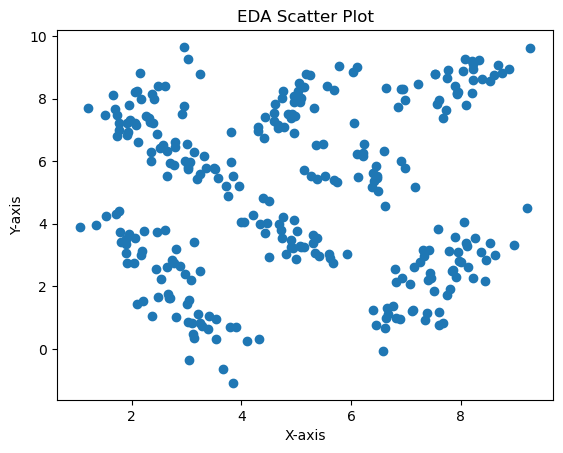

In [10]:
plt.scatter(data_X, data_Y, marker='o', label='Data Points')

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('EDA Scatter Plot')

In [11]:
initial_centers

{2: array([[ 2.06136024,  3.54047797],
        [ 6.5807212 , -0.0766824 ]]),
 3: array([[6.63352332, 0.98020705],
        [4.75184863, 4.20214023],
        [7.88828694, 8.41093125]]),
 4: array([[7.1712312 , 5.16316266],
        [8.07641652, 9.27162002],
        [7.93019866, 8.14006634],
        [1.77775261, 7.21854537]]),
 5: array([[2.05924902, 7.20598798],
        [7.59731342, 1.16504743],
        [7.10604472, 1.19751007],
        [7.67406359, 7.37819153],
        [5.60001917, 3.02332715]]),
 6: array([[6.4095594 , 5.35040201],
        [6.39056222, 5.17956451],
        [1.69565649, 7.68082458],
        [1.20162248, 7.68639714],
        [2.36430335, 1.05209713],
        [5.37413088, 5.44219234]]),
 7: array([[3.18340392, 5.42184013],
        [6.94511561, 8.30517945],
        [3.08143147, 2.18786562],
        [5.07631894, 3.30296197],
        [2.46087695, 6.86898874],
        [4.80754093, 3.03464954],
        [6.46350009, 0.77471754]]),
 8: array([[5.08001625, 3.25348762],
        [1.

## Implement K-Means

### Define Number of Data Points

In [12]:
n_points = data.shape[0]
n_points

300

### Create Cluster Label Array

In [13]:
cluster_labels = np.zeros(n_points, dtype=int)

### Initialize Maximum Number of Iterations

In [14]:
max_iterations = 1000

## Create K-Means Clustering Function

In [15]:
def k_means_clustering(data, k, centers, num_iters):

    # Get number of points
    n_points = data.shape[0]

    # Initialize cluster labels for each data point
    #cluster_labels = np.zeros(n_points, dtype=int)

    # Repeat for a fixed number of iterations
    for iteration in range(num_iters):

        # List that stores the distance from every point to every center
        distances = []

        # For every point calculate the distance to the center:
        for point in data:

            point_distances = []
            # Compute the distance from the point to every center
            for center in centers:
                distance = np.sqrt(np.sum((point - center)**2))
                point_distances.append(distance)
            distances.append(point_distances)
        # Convert to array.  Each entry is the distance to the center for that point
        distances = np.array(distances)

        # Find closest center for each point and classify
        for i in range(n_points):
            cluster_labels[i] = np.argmin(distances[i])

        # Calculate new centroids
        new_centers = np.zeros_like(centers)

        for i in range(k):
            # Find all points assigned to cluster i
            cluster_points = data[cluster_labels == i]
            # The new center is the mean of the cluster (centroid)
            if cluster_points.shape[0] > 0:
                new_centers[i] = np.mean(cluster_points, axis = 0)
            # Handle empty clusters
            else:
                new_centers[i] = centers[i]

        # Check for convergence
        if np.allclose(centers, new_centers):
            break

        # Update the centers
        centers = new_centers

    # Calculate the loss
    loss = 0
    for i in range(n_points):
        nearest_center = centers[cluster_labels[i]]
        loss += np.sum((data[i] - nearest_center)**2)

    # Return results
    return centers, cluster_labels, loss

In [16]:
initial_centers[2]

array([[ 2.06136024,  3.54047797],
       [ 6.5807212 , -0.0766824 ]])

## Perform Clustering (Method 1)

In [17]:
loss_list_1 = []
centers_list_1 = []
k_values = list(range(2, 11))

In [18]:
k_values

[2, 3, 4, 5, 6, 7, 8, 9, 10]

### k = 2

In [19]:
k = 2
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [20]:
centers

array([[4.85261193, 7.27164171],
       [5.00056234, 2.48542748]])

In [21]:
loss_list_1.append(loss)
centers_list_1.append(centers)

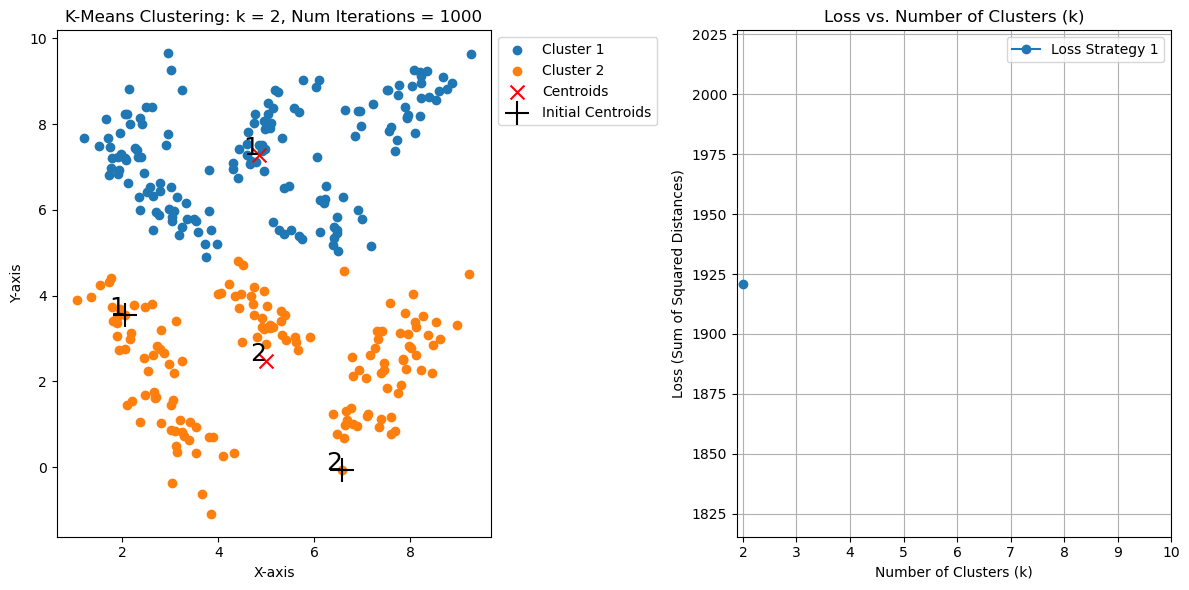

In [22]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

In [23]:
centers

array([[4.85261193, 7.27164171],
       [5.00056234, 2.48542748]])

### k = 3

In [24]:
k=3
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [25]:
loss_list_1.append(loss)
centers_list_1.append(centers)
loss_list_1

[1921.0334858562055, 1294.298417485318]

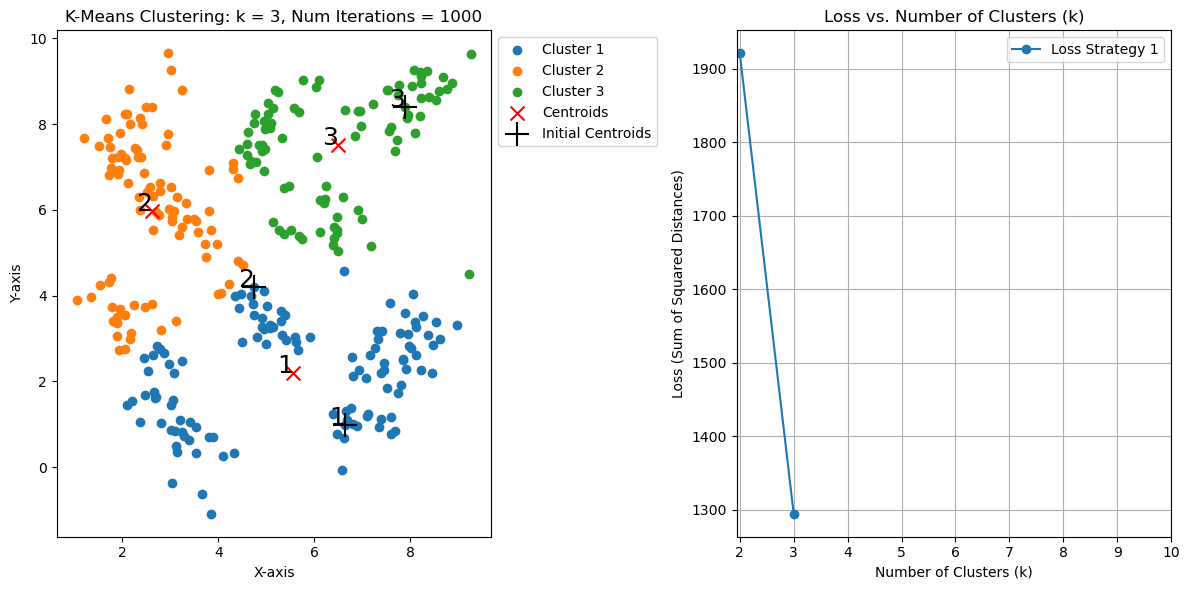

In [26]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 4

In [27]:
k = 4
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [28]:
loss_list_1.append(loss)
centers_list_1.append(centers)
loss_list_1

[1921.0334858562055, 1294.298417485318, 1116.3315012668604]

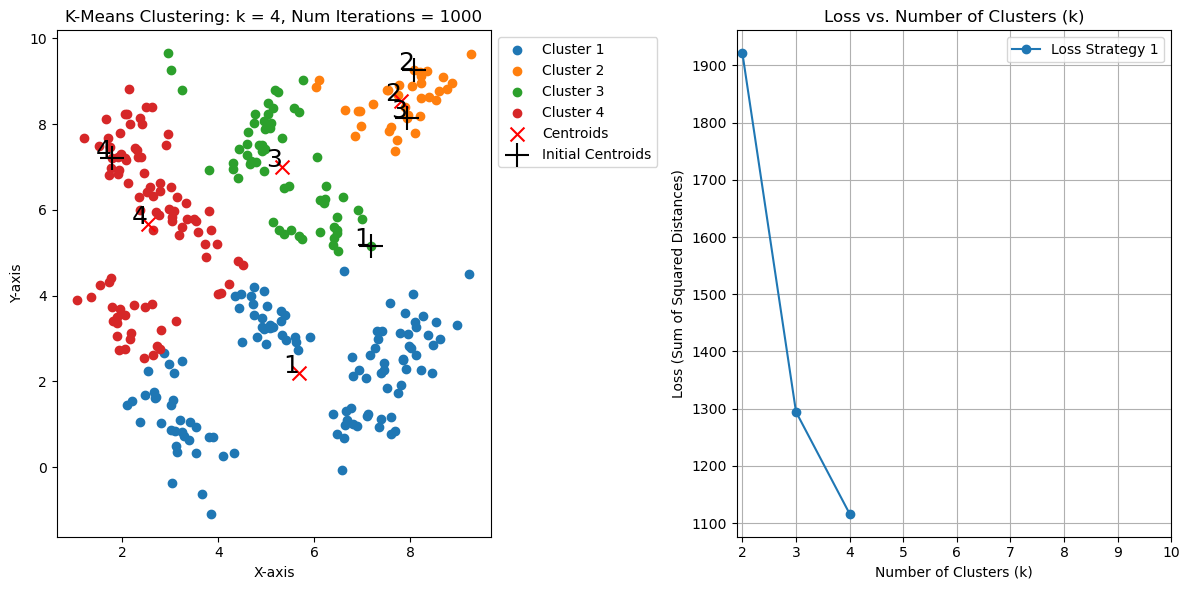

In [29]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 5

In [30]:
k = 5
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [31]:
loss_list_1.append(loss)
centers_list_1.append(centers)
loss_list_1

[1921.0334858562055, 1294.298417485318, 1116.3315012668604, 735.6040456800638]

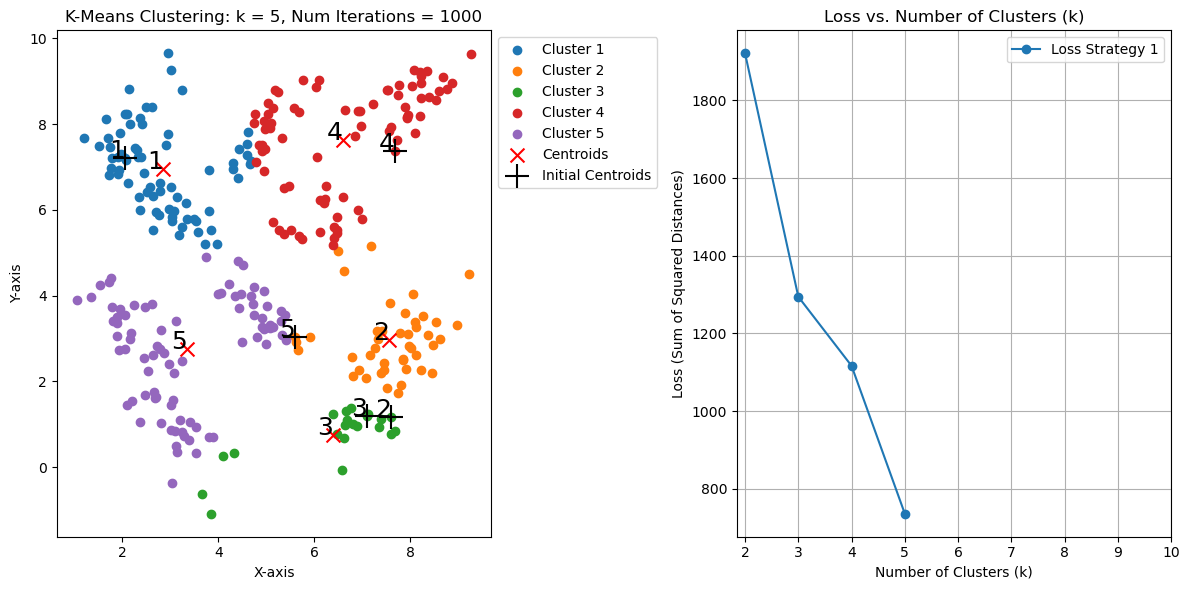

In [32]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 6

In [33]:
k = 6
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [34]:
loss_list_1.append(loss)
centers_list_1.append(centers)
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664]

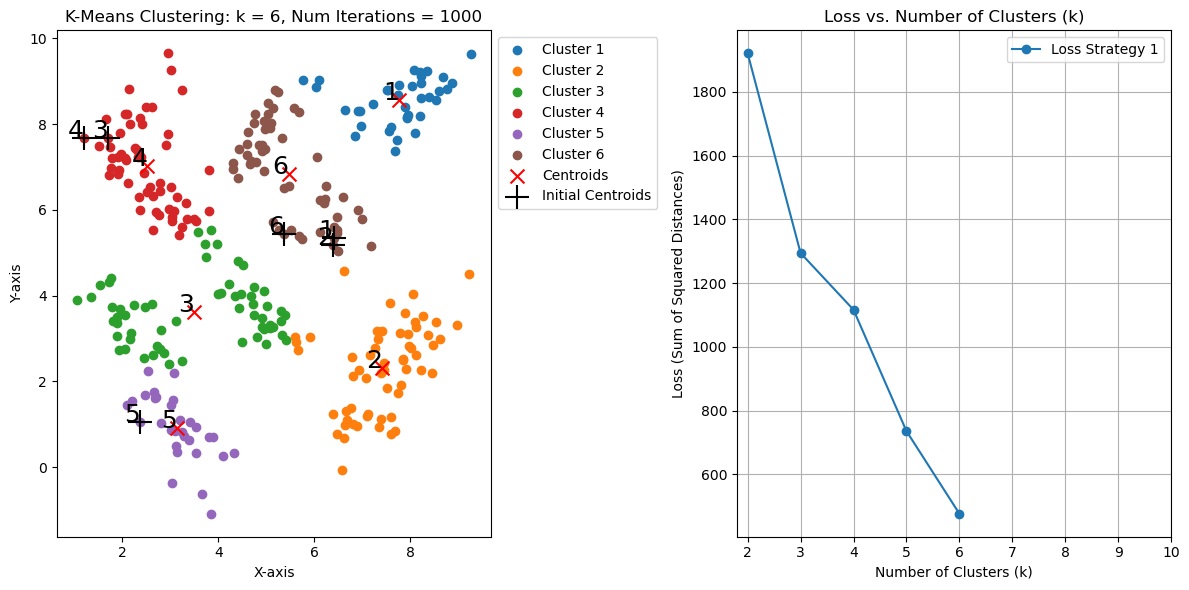

In [35]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 7

In [36]:
k = 7
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [37]:
loss_list_1.append(loss)
centers_list_1.append(centers)
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485]

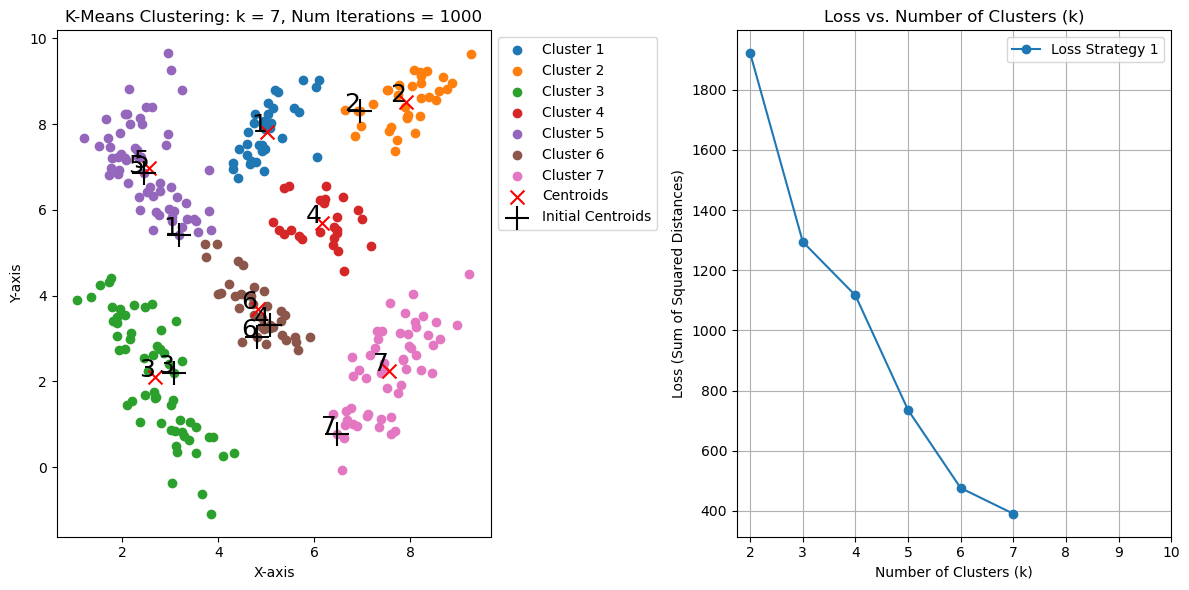

In [38]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 8

In [39]:
k = 8
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [40]:
loss_list_1.append(loss)
centers_list_1.append(centers)
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312]

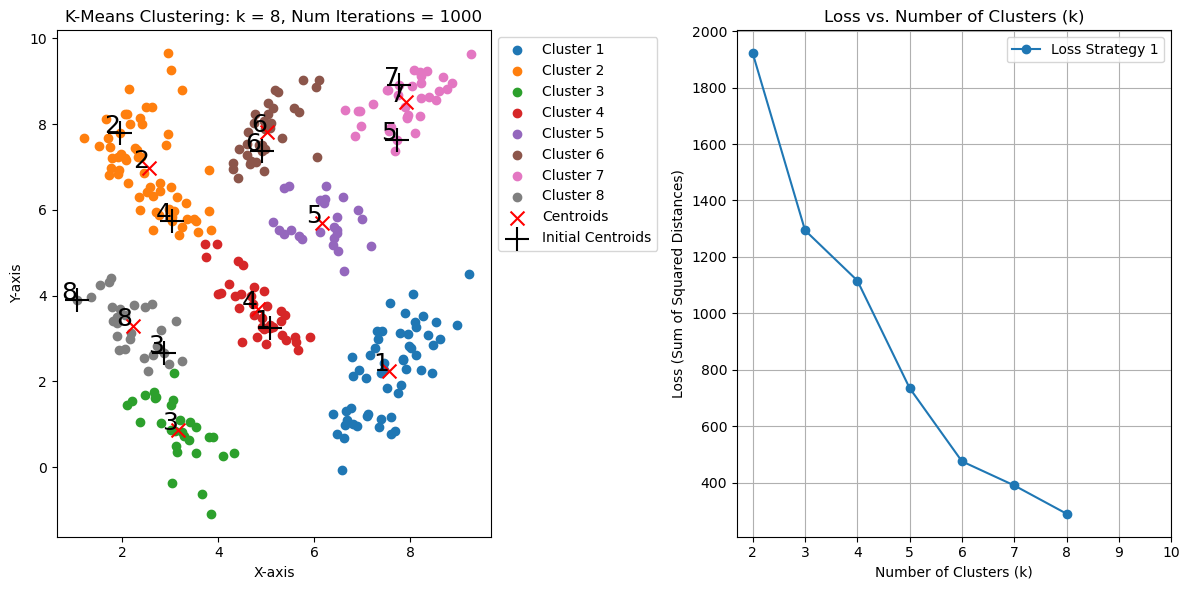

In [41]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 9

In [42]:
k = 9
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [43]:
loss_list_1.append(loss)
centers_list_1.append(centers)
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537]

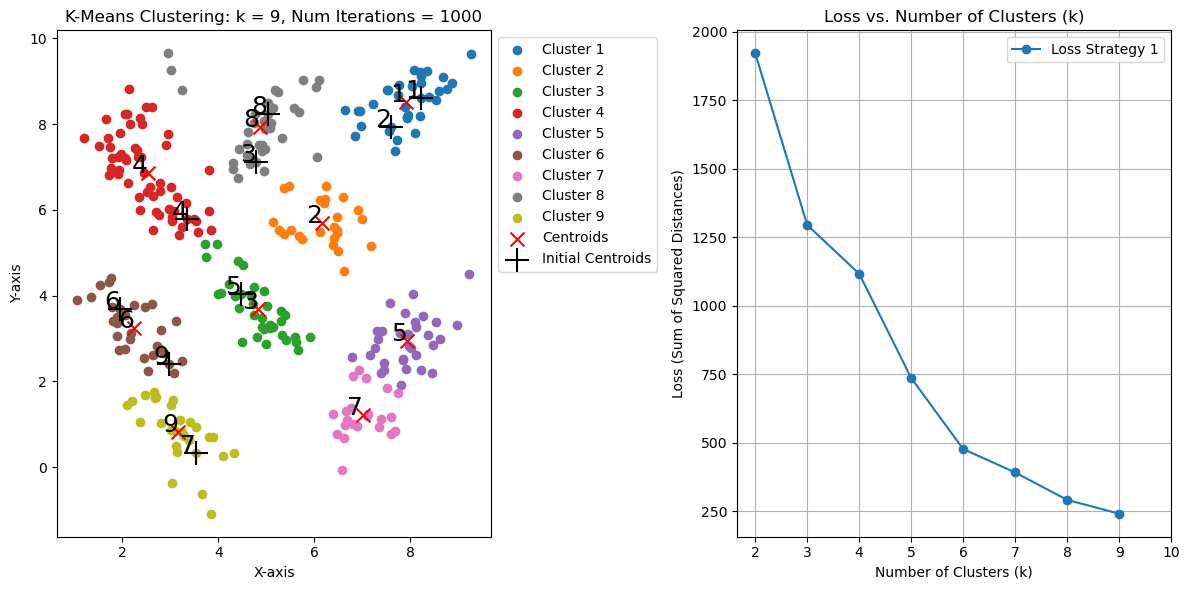

In [44]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 10

In [45]:
k = 10
centers, labels, loss = \
    k_means_clustering(
        data=data,
        k=k,
        centers=initial_centers[k],
        num_iters=max_iterations)

In [46]:
loss_list_1.append(loss)
centers_list_1.append(centers)
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

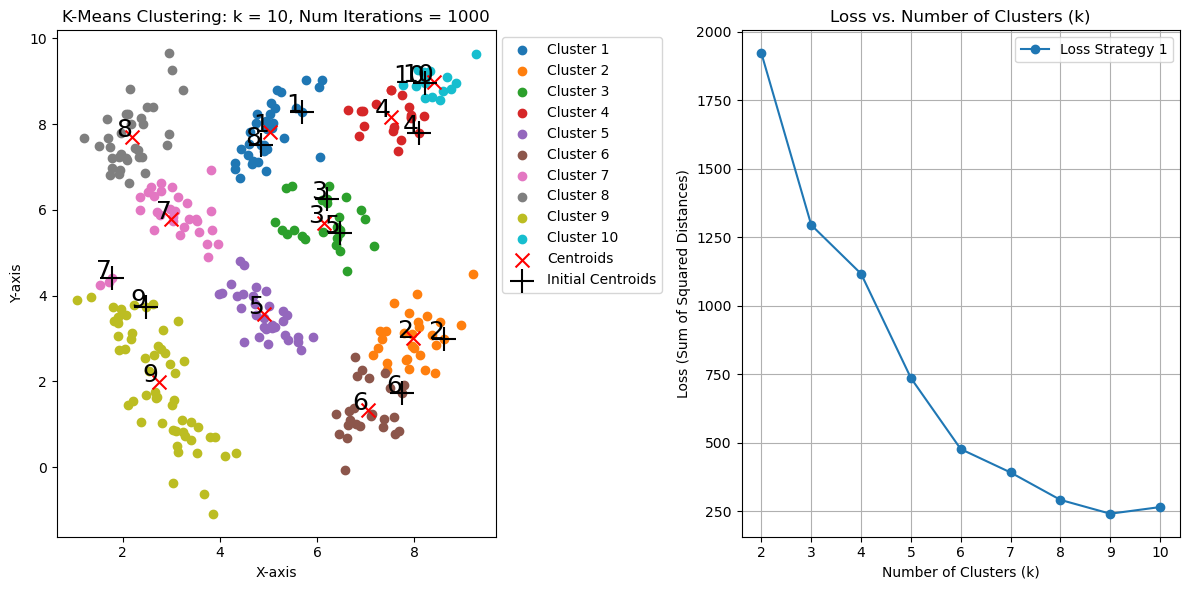

In [47]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(initial_centers[k][:,0], initial_centers[k][:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k], marker='o', linestyle='-', label="Loss Strategy 1")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(initial_centers[k]):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

## Perform Clustering (Method 2)

In [53]:
from precode_2 import *
initial_centers = {}
initial_indices = {}
for k in range(2, 11):
    centers, indices = initial_S2("5806", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers
    initial_indices[k] = indices
loss_list_2 = []
centers_list_2 = []
k_values = list(range(2, 11))

In [54]:
initial_centers

{2: array([8.37895231, 8.62509614]),
 3: array([3.03696341, 5.82211317]),
 4: array([5.07631894, 3.30296197]),
 5: array([5.08001625, 3.25348762]),
 6: array([1.89404312, 3.36258443]),
 7: array([6.6384501 , 8.33574252]),
 8: array([6.8150111 , 2.13543395]),
 9: array([5.60001917, 3.02332715]),
 10: array([1.96633923, 7.30845038])}

In [55]:
initial_indices

{2: 66, 3: 143, 4: 198, 5: 108, 6: 246, 7: 15, 8: 123, 9: 145, 10: 279}

In [56]:
data[initial_indices[2]]

array([8.37895231, 8.62509614])

In [57]:
k_values

[2, 3, 4, 5, 6, 7, 8, 9, 10]

### Create Strategy 2 Center Finding Function

In [58]:
def strategy_2_centers(data, initial_point_index, k):

    centers = [data[initial_point_index]]
    selected_indices = {initial_point_index}

    for i in range(1, k):
        max_avg = -np.inf
        next_index = None

        for idx, point in enumerate(data):
            # Skip if this point is already chosen as a center
            if idx in selected_indices:
                continue

            distances = [np.linalg.norm(point - center) for center in centers]
            avg_distance = np.mean(distances)

            if avg_distance > max_avg:
                max_avg = avg_distance
                next_index = idx

        if next_index is None:
            break

        # Append the newly selected center and record its index
        centers.append(data[next_index])
        selected_indices.add(next_index)

    #return np.array(centers), selected_indices
    return np.array(centers)

### Test Strategy 2 Function

In [59]:
k = 5
strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)

array([[ 5.08001625,  3.25348762],
       [ 9.26998864,  9.62492869],
       [ 3.85212146, -1.08715226],
       [ 2.95297924,  9.65073899],
       [ 3.04101702, -0.36138487]])

### k = 2

In [60]:
k = 2

In [61]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 8.37895231,  8.62509614],
       [ 3.85212146, -1.08715226]])

In [62]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [63]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055]

In [64]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

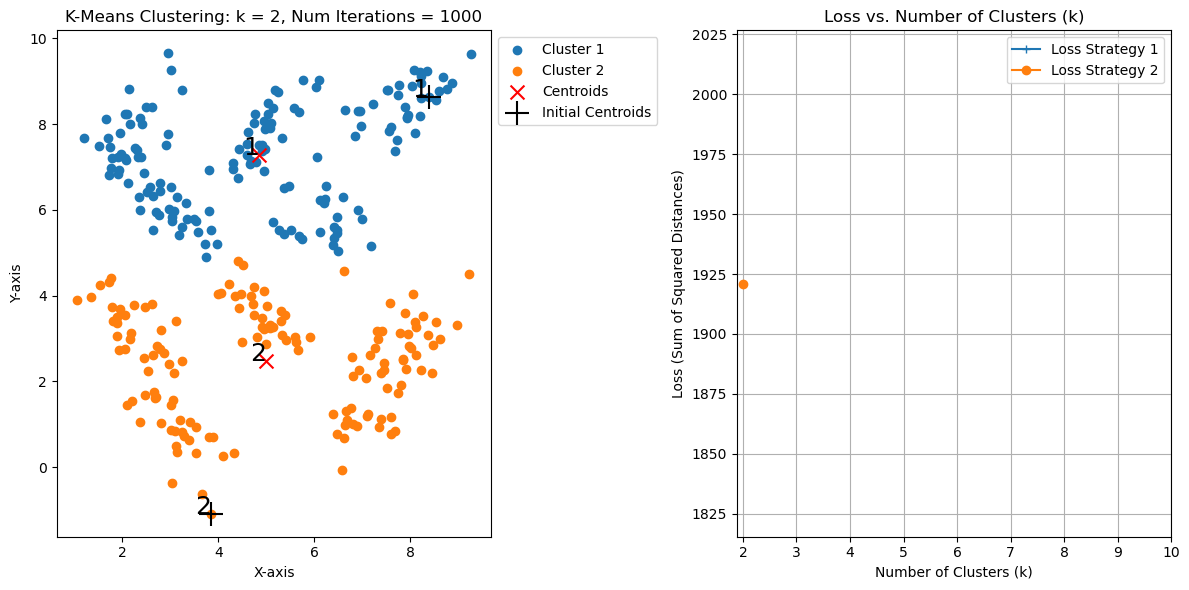

In [65]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 3

In [66]:
k = 3

In [67]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 3.03696341,  5.82211317],
       [ 9.26998864,  9.62492869],
       [ 3.85212146, -1.08715226]])

In [68]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [69]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055, 1294.298417485318]

In [70]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

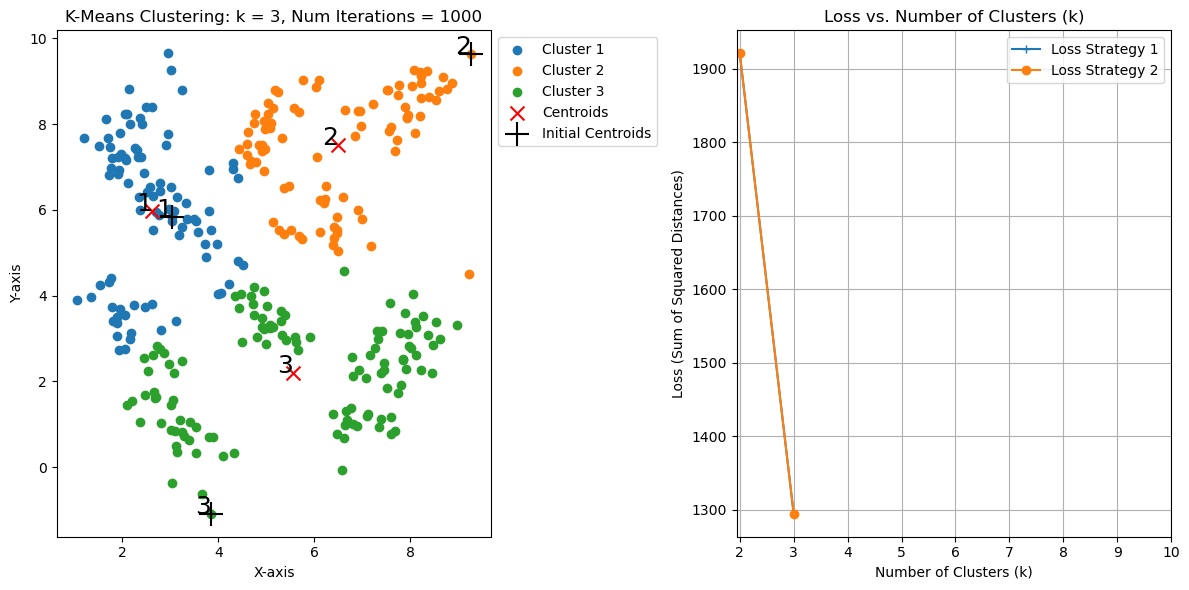

In [71]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 4

In [72]:
k = 4

In [73]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 5.07631894,  3.30296197],
       [ 9.26998864,  9.62492869],
       [ 3.85212146, -1.08715226],
       [ 2.95297924,  9.65073899]])

In [74]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [75]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055, 1294.298417485318, 805.1166457472608]

In [76]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

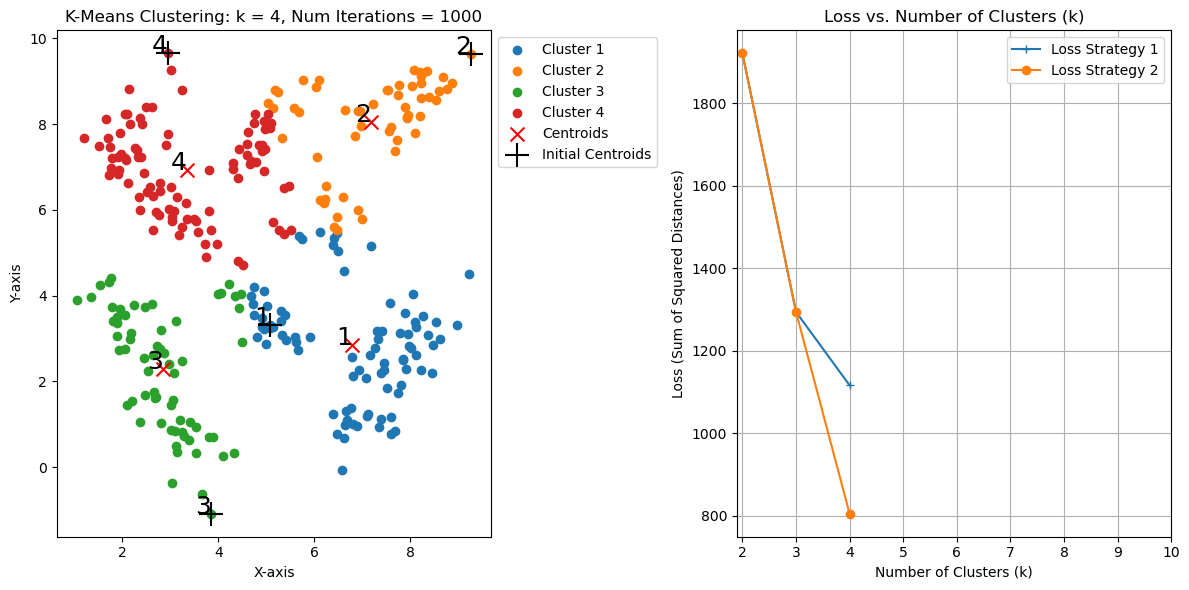

In [77]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 5

In [78]:
k = 5

In [79]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 5.08001625,  3.25348762],
       [ 9.26998864,  9.62492869],
       [ 3.85212146, -1.08715226],
       [ 2.95297924,  9.65073899],
       [ 3.04101702, -0.36138487]])

In [80]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [81]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055, 1294.298417485318, 805.1166457472608, 592.0694342732747]

In [82]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

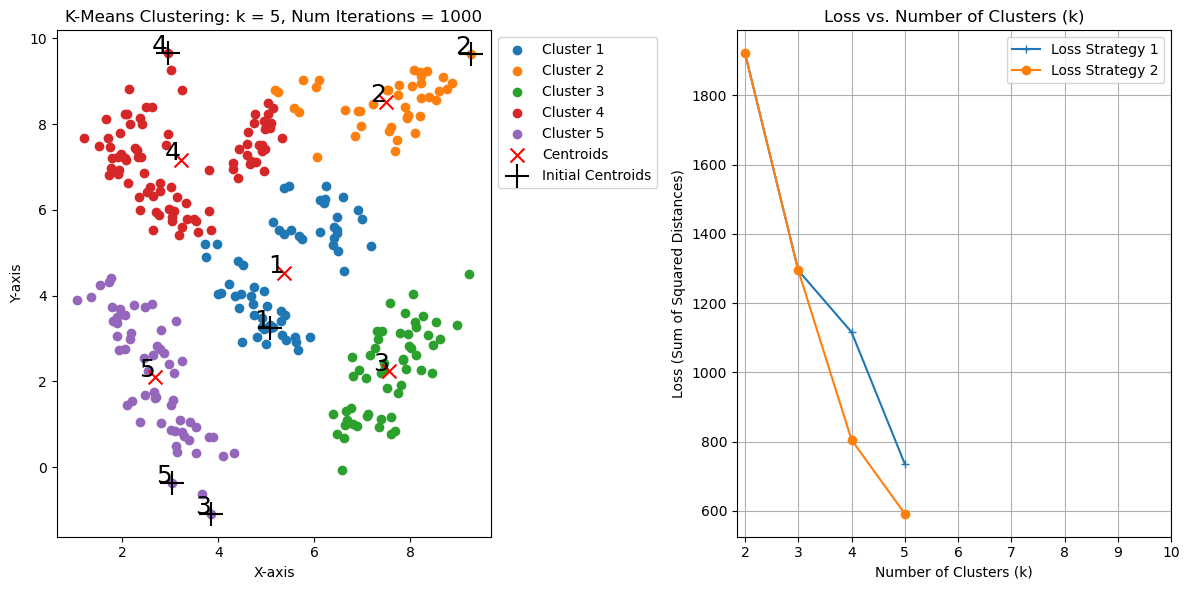

In [83]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 6

In [84]:
k = 6

In [85]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 1.89404312,  3.36258443],
       [ 9.26998864,  9.62492869],
       [ 3.85212146, -1.08715226],
       [ 2.95297924,  9.65073899],
       [ 7.68097556,  0.83542043],
       [ 8.87578072,  8.96092361]])

In [86]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [87]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055,
 1294.298417485318,
 805.1166457472608,
 592.0694342732747,
 476.118751676353]

In [88]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

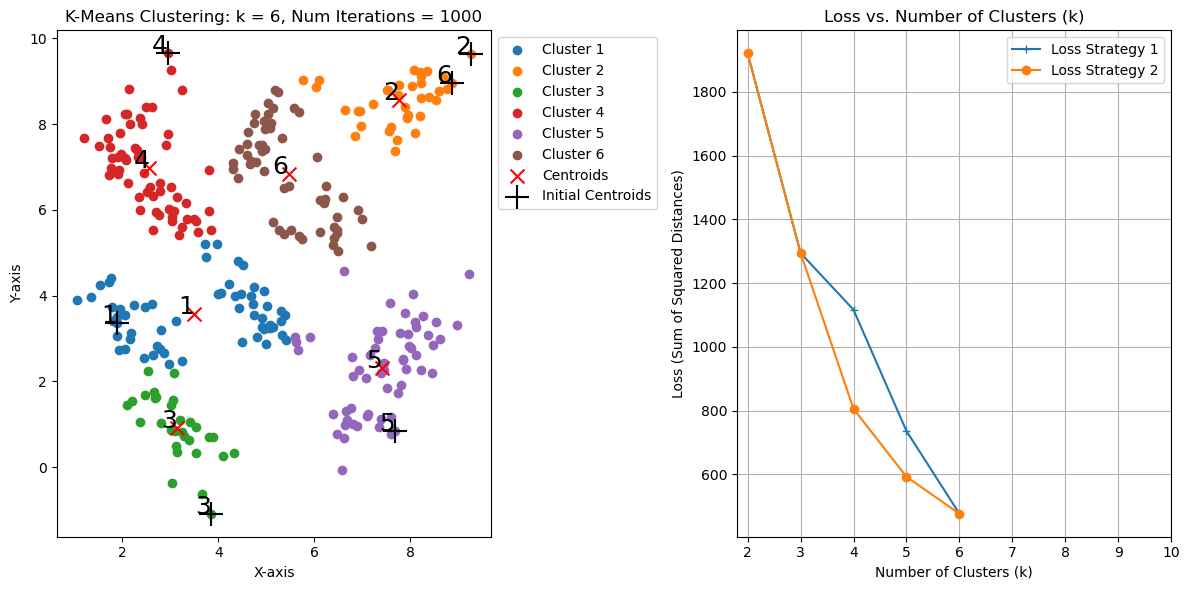

In [89]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 7

In [90]:
k = 7

In [91]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 6.6384501 ,  8.33574252],
       [ 3.85212146, -1.08715226],
       [ 9.26998864,  9.62492869],
       [ 1.20162248,  7.68639714],
       [ 6.5807212 , -0.0766824 ],
       [ 3.04101702, -0.36138487],
       [ 2.95297924,  9.65073899]])

In [92]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [93]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055,
 1294.298417485318,
 805.1166457472608,
 592.0694342732747,
 476.118751676353,
 419.58848581886525]

In [94]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

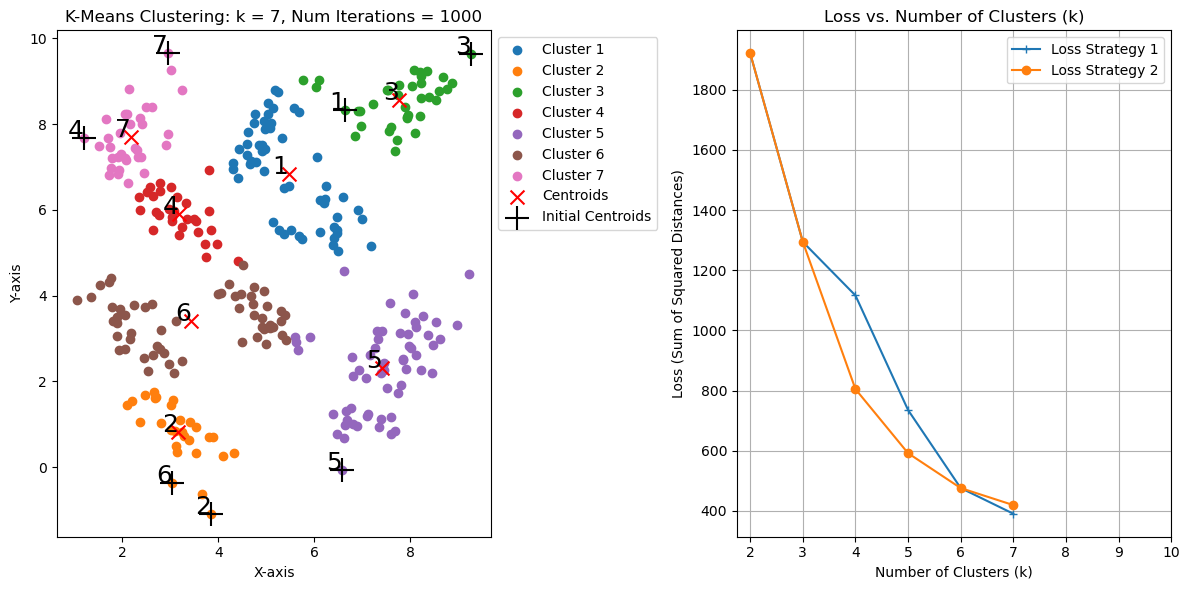

In [95]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 8

In [96]:
k = 8

In [97]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 6.8150111 ,  2.13543395],
       [ 2.95297924,  9.65073899],
       [ 3.85212146, -1.08715226],
       [ 9.26998864,  9.62492869],
       [ 1.20162248,  7.68639714],
       [ 3.04101702, -0.36138487],
       [ 8.87578072,  8.96092361],
       [ 6.5807212 , -0.0766824 ]])

In [98]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [99]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055,
 1294.298417485318,
 805.1166457472608,
 592.0694342732747,
 476.118751676353,
 419.58848581886525,
 290.92433447443756]

In [100]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

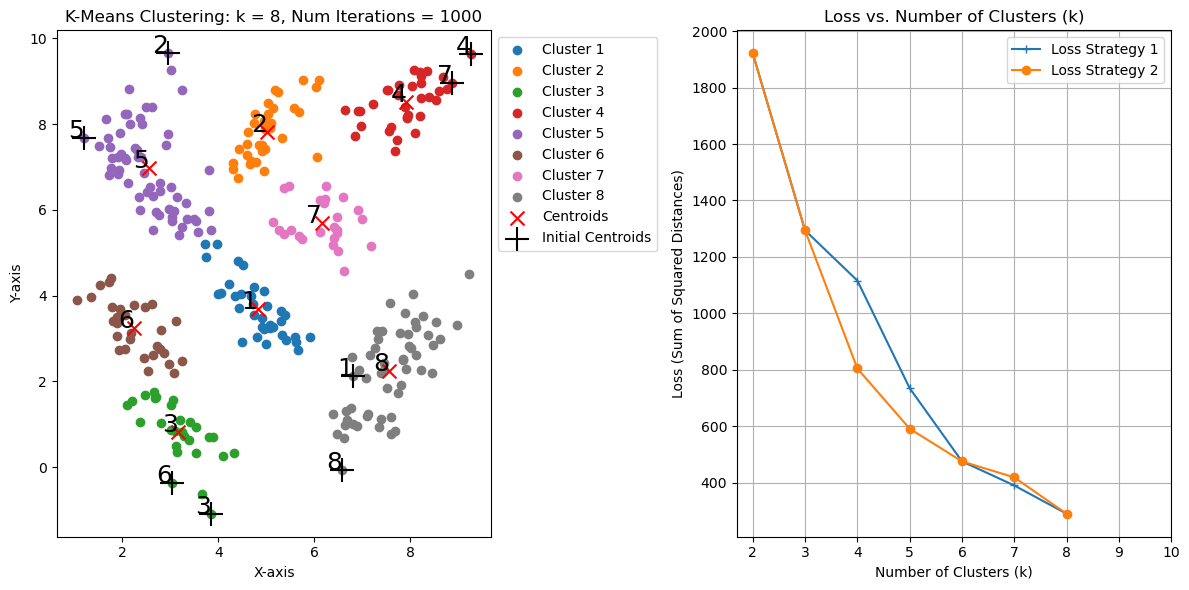

In [101]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 9

In [102]:
k = 9

In [103]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 5.60001917,  3.02332715],
       [ 9.26998864,  9.62492869],
       [ 3.85212146, -1.08715226],
       [ 2.95297924,  9.65073899],
       [ 3.04101702, -0.36138487],
       [ 8.87578072,  8.96092361],
       [ 1.20162248,  7.68639714],
       [ 6.5807212 , -0.0766824 ],
       [ 8.67805277,  9.08757916]])

In [104]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [105]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055,
 1294.298417485318,
 805.1166457472608,
 592.0694342732747,
 476.118751676353,
 419.58848581886525,
 290.92433447443756,
 278.7383157517935]

In [106]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

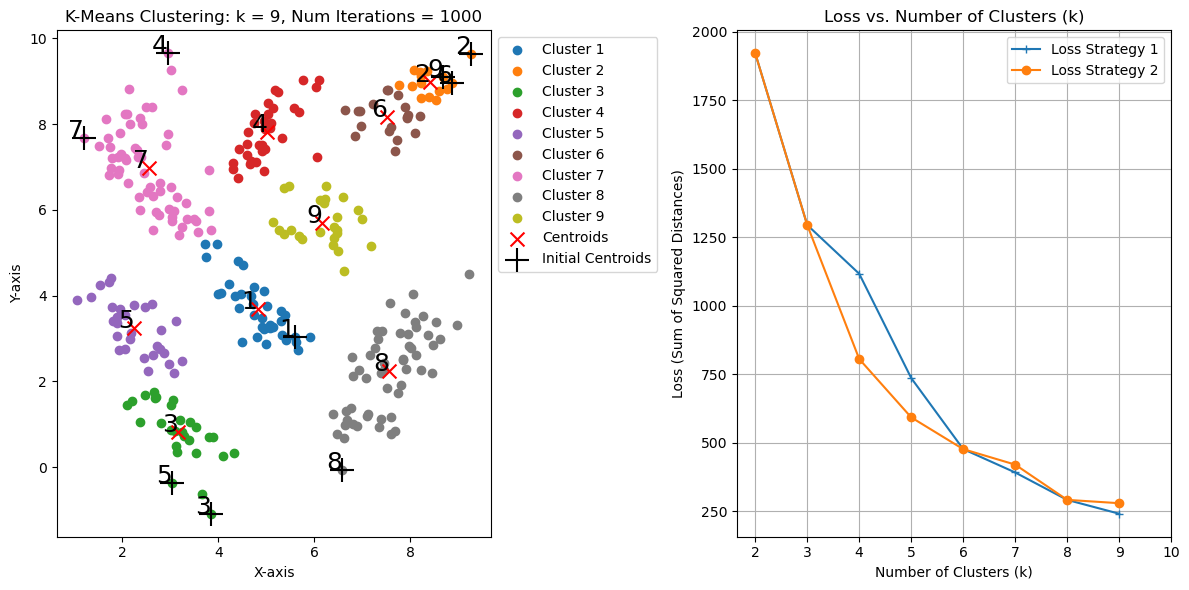

In [107]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()

### k = 10

In [108]:
k = 10

In [109]:
new_centers = strategy_2_centers(data=data, initial_point_index=initial_indices[k], k=k)
new_centers

array([[ 1.96633923,  7.30845038],
       [ 6.5807212 , -0.0766824 ],
       [ 9.26998864,  9.62492869],
       [ 3.85212146, -1.08715226],
       [ 2.95297924,  9.65073899],
       [ 8.87578072,  8.96092361],
       [ 3.04101702, -0.36138487],
       [ 8.9702889 ,  3.32150578],
       [ 1.20162248,  7.68639714],
       [ 3.66118224, -0.63372377]])

In [110]:
centers_2, labels, loss_2 = \
    k_means_clustering(
        data=data,
        k=k,
        centers=new_centers,
        num_iters=max_iterations)

In [111]:
loss_list_2.append(loss_2)
centers_list_2.append(centers_2)
loss_list_2

[1921.0334858562055,
 1294.298417485318,
 805.1166457472608,
 592.0694342732747,
 476.118751676353,
 419.58848581886525,
 290.92433447443756,
 278.7383157517935,
 224.08688719123074]

In [112]:
loss_list_1

[1921.0334858562055,
 1294.298417485318,
 1116.3315012668604,
 735.6040456800638,
 476.2965705269664,
 390.91757625422485,
 290.8573092438312,
 240.38031402770537,
 264.5927990497849]

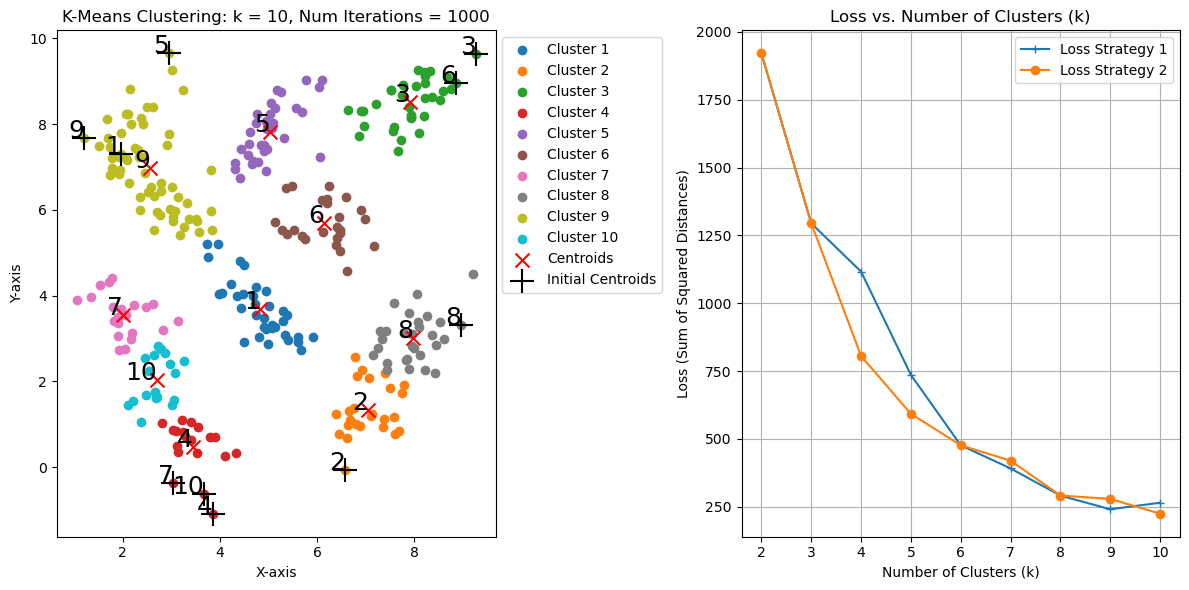

In [113]:
 # Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot the clustered data
for i in range(k):
    cluster_points = data[cluster_labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], color='red', marker='x', s=100, label="Centroids")
axes[0].scatter(new_centers[:,0], new_centers[:,1], color='black', marker='+', s=300, label='Initial Centroids')
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].set_title(f"K-Means Clustering: k = {k}, Num Iterations = {max_iterations}")
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# Plot 2: Loss vs Number of Clusters
axes[1].set_title("Loss vs. Number of Clusters (k)")
axes[1].plot(k_values[:k-1], loss_list_1[:k-1], marker='+', linestyle='-', label="Loss Strategy 1")
axes[1].plot(k_values[:k-1], loss_list_2[:k], marker='o', linestyle='-', label = "Loss Strategy 2")
axes[1].set_xticks(np.arange(2, 11, 1))
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Loss (Sum of Squared Distances)")
axes[1].legend()
axes[1].grid(True)

# Annotate centroids with numbers
for i, (x, y) in enumerate(new_centers):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')
for i, (x, y) in enumerate(centers_2):
    axes[0].text(x, y, str(i+1), fontsize=18, color='black', ha='right')

plt.tight_layout()
plt.show()